### Importing Libraries

In [3]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import sqlite3
import os
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Downloading Files from S3 Bucket

In [4]:
#!pip install boto3
import os
import boto3
from KEYS import ACCESS_KEY, SECRET_ACCESS_KEY

In [5]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_ACCESS_KEY
    )
bucket_name = 'pep2'
folder_key = 'NBA/raw_data/'
local_folder = 'csv/'
# "play_by_play.csv"
files = ["common_player_info.csv", "draft_combine_stats.csv","draft_history.csv","game.csv","game_info.csv","game_summary.csv","inactive_players.csv","line_score.csv","officials.csv","other_stats.csv","player.csv","team.csv","team_details.csv","team_history.csv","team_info_common.csv"]
# files = ['game.csv', 'team.csv', 'player.csv']  # List of files to download

for file in files:
    key = folder_key + file
    filename = local_folder + file

    s3_client.download_file(bucket_name, key, filename)
    print(f"Downloaded file: {filename}")


Downloaded file: csv/common_player_info.csv
Downloaded file: csv/draft_combine_stats.csv
Downloaded file: csv/draft_history.csv
Downloaded file: csv/game.csv
Downloaded file: csv/game_info.csv
Downloaded file: csv/game_summary.csv
Downloaded file: csv/inactive_players.csv
Downloaded file: csv/line_score.csv
Downloaded file: csv/officials.csv
Downloaded file: csv/other_stats.csv
Downloaded file: csv/player.csv
Downloaded file: csv/team.csv
Downloaded file: csv/team_details.csv
Downloaded file: csv/team_history.csv
Downloaded file: csv/team_info_common.csv


### Reading files from folder

In [6]:
folder_path = "csv/"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Print the file names
for file in files:
    print(file)


common_player_info.csv
draft_combine_stats.csv
draft_history.csv
game.csv
game_info.csv
game_summary.csv
inactive_players.csv
line_score.csv
officials.csv
other_stats.csv
player.csv
play_by_play.csv
team.csv
team_details.csv
team_history.csv
team_info_common.csv


In [7]:
# "play_by_play.csv"
file_names = ["common_player_info.csv", "draft_combine_stats.csv","draft_history.csv","game.csv","game_info.csv","game_summary.csv","inactive_players.csv","line_score.csv","officials.csv","other_stats.csv","player.csv","team.csv","team_details.csv","team_history.csv","team_info_common.csv"]

### Creating dataframes

In [180]:
dataframes = {}
for file_name in file_names:
    file_path = "csv/" + file_name  # Update with the actual folder path
    df = pd.read_csv(file_path, low_memory=False)
    dataframes[file_name] = df

In [187]:
df_common_player_info = dataframes["common_player_info.csv"]
df_draft_combine_stats = dataframes["draft_combine_stats.csv"]
df_draft_history = dataframes["draft_history.csv"]
df_game= dataframes["game.csv"]
df_game_info = dataframes["game_info.csv"]
df_game_summary = dataframes["game_summary.csv"]
df_inactive_players = dataframes["inactive_players.csv"]
df_line_score = dataframes["line_score.csv"]
df_officials = dataframes["officials.csv"]
df_other_stats = dataframes["other_stats.csv"]
df_player = dataframes["player.csv"]
# df_play_by_play = dataframes["play_by_play.csv"]
df_team = dataframes["team.csv"]
df_team_details = dataframes["team_details.csv"]
df_team_history = dataframes["team_history.csv"]
df_team_info_common = dataframes["team_info_common.csv"]

## Data cleaning: 
df_team, df_team_details, df_team_history, df_team_info_common

In [191]:
#checking data types
#df_team
df_team["year_founded"] = df_team["year_founded"].astype(int)
df_team["state"] = df_team["state"].replace("Atlanta", "Georgia")
df_team.rename(columns={"id":"team_id"}, inplace=True)

# df_team_details
new_column_names= {"yearfounded" : "year_founded","arenacapacity": "arena_capacity", "dleagueaffiliation":"league_affiliation"}
df_team_details = df_team_details.rename(columns=new_column_names)
df_team_details[["year_founded", "arena_capacity"]] = df_team_details[["year_founded", "arena_capacity"]].astype(pd.Int64Dtype())
df_team_details.info()
html = (df_team_details.to_html(render_links=True, escape=False))
HTML(html)

# df_team_info_common.info()
# df_team_history


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   team_id             30 non-null     int64 
 1   abbreviation        30 non-null     object
 2   nickname            30 non-null     object
 3   year_founded        30 non-null     Int64 
 4   city                30 non-null     object
 5   arena               30 non-null     object
 6   arena_capacity      20 non-null     Int64 
 7   owner               30 non-null     object
 8   generalmanager      30 non-null     object
 9   headcoach           30 non-null     object
 10  league_affiliation  30 non-null     object
 11  facebook            30 non-null     object
 12  instagram           30 non-null     object
 13  twitter             30 non-null     object
dtypes: Int64(2), int64(1), object(11)
memory usage: 3.5+ KB


,team_id,abbreviation,nickname,year_founded,city,arena,arena_capacity,owner,generalmanager,headcoach,league_affiliation,facebook,instagram,twitter
0,1610612737,ATL,Hawks,1949,Atlanta,State Farm Arena,18729,Tony Ressler,Travis Schlenk,Quin Snyder,College Park Skyhawks,https://www.facebook.com/hawks,https://instagram.com/atlhawks,https://twitter.com/ATLHawks
1,1610612738,BOS,Celtics,1946,Boston,TD Garden,18624,Wyc Grousbeck,Brad Stevens,Joe Mazzulla,Maine Celtics,https://www.facebook.com/bostonceltics,https://instagram.com/celtics,https://twitter.com/celtics
2,1610612739,CLE,Cavaliers,1970,Cleveland,Rocket Mortgage FieldHouse,20562,Dan Gilbert,Koby Altman,JB Bickerstaff,Cleveland Charge,https://www.facebook.com/Cavs,https://instagram.com/cavs,https://twitter.com/cavs
3,1610612740,NOP,Pelicans,2002,New Orleans,Smoothie King Center,,Tom Benson,Trajan Langdon,Willie Green,Birmingham Squadron,https://www.facebook.com/PelicansNBA,https://instagram.com/pelicansnba,https://twitter.com/PelicansNBA
4,1610612741,CHI,Bulls,1966,Chicago,United Center,21711,Jerry Reinsdorf,Arturas Karnisovas,Billy Donovan,Windy City Bulls,https://www.facebook.com/chicagobulls,https://instagram.com/chicagobulls,https://twitter.com/chicagobulls
5,1610612742,DAL,Mavericks,1980,Dallas,American Airlines Center,19200,Mark Cuban,Nico Harrison,Jason Kidd,Texas Legends,https://www.facebook.com/dallasmavs,https://instagram.com/dallasmavs,https://twitter.com/dallasmavs
6,1610612743,DEN,Nuggets,1976,Denver,Ball Arena,,Stan Kroenke,Calvin Booth,Michael Malone,Grand Rapids Gold,https://www.facebook.com/DenverNuggets,https://instagram.com/nuggets,https://twitter.com/nuggets
7,1610612744,GSW,Warriors,1946,Golden State,Chase Center,,Joe Lacob,Bob Myers,Steve Kerr,Santa Cruz Warriors,https://www.facebook.com/warriors,https://instagram.com/warriors,https://twitter.com/warriors
8,1610612745,HOU,Rockets,1967,Houston,Toyota Center,18104,Tilman Fertitta,Rafael Stone,Stephen Silas,Rio Grande Valley Vipers,https://www.facebook.com/houstonrockets,https://instagram.com/houstonrockets,https://twitter.com/HoustonRockets
9,1610612746,LAC,Clippers,1970,Los Angeles,Crypto.com Arena,19060,Steve Ballmer,Michael Winger,Tyronn Lue,Agua Caliente Clippers of Ontario,https://www.facebook.com/LAClippers,https://instagram.com/laclippers,https://twitter.com/LAClippers


In [192]:
# changing the data type
# df_game.info()
df_game["game_date"] = pd.to_datetime(df_game["game_date"])

#df_game_info.info()
df_game_info["game_date"] = pd.to_datetime(df_game_info["game_date"])

#df_game_summary
df_game_summary["game_date_est"] = pd.to_datetime(df_game_summary["game_date_est"])
# df_team_history.info()

In [193]:
#checking the null values
# df_team.isnull().sum()
# df_team_details.isnull().sum()
# df_team_history.isnull().sum()
# df_team_info_common.isnull().sum()

# df_team_history.dropna(axis="index", how="all")

### Joining All The Teams Dataframes

In [194]:
join_team_table_1 = df_team.merge(df_team_details, on =["team_id","abbreviation", "nickname","city", "year_founded"], how = "inner")
join_team_table_2 = join_team_table_1.merge(df_team_info_common, on =["team_id"], how = "inner")
join_team_table_2.drop(columns=["team_city","team_name", "team_abbreviation", "team_code","team_slug"], inplace=True)
join_team_table_2.head()

,team_id,full_name,abbreviation,nickname,city,state,year_founded,arena,arena_capacity,owner,...,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949,State Farm Arena,18729,Tony Ressler,...,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946,TD Garden,18624,Wyc Grousbeck,...,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970,Rocket Mortgage FieldHouse,20562,Dan Gilbert,...,0,22022,25,112.0,23,41.7,18,24.9,1,106.4
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002,Smoothie King Center,<NA>,Tom Benson,...,0,22022,16,114.2,14,43.7,11,25.5,16,113.4
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966,United Center,21711,Jerry Reinsdorf,...,0,22022,20,113.0,21,42.6,22,24.1,11,112.7


In [195]:
final_team_table = join_team_table_2.merge(df_team_history, on =["team_id", "nickname","city", "year_founded"], how = "left")
final_team_table.head()

,team_id,full_name,abbreviation,nickname,city,state,year_founded,arena,arena_capacity,owner,...,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg,year_active_till
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949,State Farm Arena,18729,Tony Ressler,...,22022,7,117.0,12,43.7,20,24.6,21,116.9,NaN
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946,TD Garden,18624,Wyc Grousbeck,...,22022,4,117.7,6,45.2,7,26.3,9,112.4,2019.0
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970,Rocket Mortgage FieldHouse,20562,Dan Gilbert,...,22022,25,112.0,23,41.7,18,24.9,1,106.4,2019.0
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002,Smoothie King Center,<NA>,Tom Benson,...,22022,16,114.2,14,43.7,11,25.5,16,113.4,NaN
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966,United Center,21711,Jerry Reinsdorf,...,22022,20,113.0,21,42.6,22,24.1,11,112.7,2019.0


# game, game_info, game_summary

### Data Cleaning(game,game_info, game_summary)

In [196]:
# df_game.info()
# df_game_info.info()
df_game_info["attendance"] = df_game_info["attendance"].astype(pd.Int64Dtype())
df_game_summary["season"] = df_game_summary["season"].astype(pd.Int64Dtype())
df_game_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60796 entries, 0 to 60795
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   game_date_est                     60796 non-null  datetime64[ns]
 1   game_sequence                     31611 non-null  float64       
 2   game_id                           60796 non-null  int64         
 3   game_status_id                    60796 non-null  int64         
 4   game_status_text                  31069 non-null  object        
 5   gamecode                          60796 non-null  object        
 6   home_team_id                      60796 non-null  int64         
 7   visitor_team_id                   60796 non-null  int64         
 8   season                            60796 non-null  Int64         
 9   live_period                       60796 non-null  int64         
 10  live_pc_time                      1748 non-nul

In [223]:
# df_game.isnull().sum()
# df_game_info.isnull().sum()
# df_game_summary.isnull().sum()

## Joining(game, game_info, game_summary)

In [198]:
join_game_table1 = df_game_info.merge(df_game_summary, on=["game_id"], how="inner")
final_game_table = df_game.merge(join_game_table1, on=["game_id", "game_date"], how="left")


final_game_table.head()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,...,NaN,19461101/NYKHUS,1.610610e+09,1.610613e+09,1946,5.0,NaN,NaN,Q5 -,1.0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,...,NaN,19461102/PITBOM,1.610610e+09,1.610610e+09,1946,4.0,NaN,NaN,Q4 -,1.0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,...,NaN,19461102/BOSPRO,1.610610e+09,1.610613e+09,1946,4.0,NaN,NaN,Q4 -,1.0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,...,NaN,19461102/NYKCHS,1.610610e+09,1.610613e+09,1946,4.0,NaN,NaN,Q4 -,1.0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,...,NaN,19461102/WASDEF,1.610610e+09,1.610610e+09,1946,4.0,NaN,NaN,Q4 -,1.0


## Data Cleaning (player, common_player_info, inactive_players)

In [224]:
# df_player

df_player= df_player.rename(columns={"id":"player_id"})
# df_player.info()
#df_inactive_players
df_inactive_players["jersey_num"] = df_inactive_players["jersey_num"].replace('-', np.nan).astype(float)
df_inactive_players["jersey_num"] = df_inactive_players["jersey_num"].fillna(-1).astype(int)

# df_inactive_players.info()



# df_common_player_info.info()
df_common_player_info = df_common_player_info.rename(columns={"person_id" : "player_id", "jersey": "jersey_num"})

df_common_player_info["birthdate"] = pd.to_datetime(df_common_player_info["birthdate"])
# df_common_player_info["weight"] = df_common_player_info["weight"].replace("nan", 0)
# df_common_player_info[["first_name","jersey_num"]]
# df_common_player_info["position"].unique()
df_common_player_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   player_id                         2457 non-null   int64         
 1   first_name                        2457 non-null   object        
 2   last_name                         2457 non-null   object        
 3   display_first_last                2457 non-null   object        
 4   display_last_comma_first          2457 non-null   object        
 5   display_fi_last                   2457 non-null   object        
 6   player_slug                       2457 non-null   object        
 7   birthdate                         2457 non-null   datetime64[ns]
 8   school                            2453 non-null   object        
 9   country                           2457 non-null   object        
 10  last_affiliation                  2457 non-null 

### Joning(player, inactive_players, common_player_info)



In [225]:
# Extract the common columns for merging
common_columns = ["player_id", "first_name", "last_name"]

# Merge df_player and df_common_player_info using merge()
join_player_table1 = pd.merge(df_player[common_columns], df_common_player_info, on=common_columns)

# Merge df_inactive_players and join_player_table1 using merge()
final_player_table = pd.merge(df_inactive_players[common_columns], join_player_table1, on=common_columns)

# Print information about the final_player_table DataFrame
final_player_table.head()


,player_id,first_name,last_name,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,...,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,781,Will,Perdue,Will Perdue,"Perdue, Will",W. Perdue,will-perdue,1965-08-29,Vanderbilt,USA,...,will_perdue,1988.0,2000.0,N,Y,Y,1988,1,11,N
1,781,Will,Perdue,Will Perdue,"Perdue, Will",W. Perdue,will-perdue,1965-08-29,Vanderbilt,USA,...,will_perdue,1988.0,2000.0,N,Y,Y,1988,1,11,N
2,698,Eddie,Johnson,Eddie Johnson,"Johnson, Eddie",E. Johnson,eddie-johnson,1959-05-01,Illinois,USA,...,eddie_johnson,1981.0,1998.0,N,Y,Y,1981,2,29,N
3,32,Clifford,Rozier,Clifford Rozier,"Rozier, Clifford",C. Rozier,clifford-rozier,1972-10-31,Louisville,USA,...,clifford_rozier,1994.0,1997.0,N,Y,Y,1994,1,16,N
4,291,Ed,Pinckney,Ed Pinckney,"Pinckney, Ed",E. Pinckney,ed-pinckney,1963-03-27,Villanova,USA,...,ed_pinckney,1985.0,1996.0,N,Y,Y,1985,1,10,N


### Joining(draft_history, draft_combine_history)

In [226]:
df_draft_history = df_draft_history.rename(columns={"person_id":"player_id"})
# df_draft_combine_stats.info()
join_draft_table1 = df_draft_combine_stats.merge(df_draft_history, on=["player_id","season", "player_name"], how="right")
join_draft_table1.head()


,season,player_id,first_name,last_name,player_name,position,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,...,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,1947,79299,NaN,NaN,Clifton McNeeley,NaN,NaN,NaN,NaN,NaN,...,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,1947,78109,NaN,NaN,Glen Selbo,NaN,NaN,NaN,NaN,NaN,...,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,1947,76649,NaN,NaN,Eddie Ehlers,NaN,NaN,NaN,NaN,NaN,...,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,1947,79302,NaN,NaN,Walt Dropo,NaN,NaN,NaN,NaN,NaN,...,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,1947,77048,NaN,NaN,Dick Holub,NaN,NaN,NaN,NaN,NaN,...,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


### Other table(play_by_play, other_stats, officials, line_score)

In [202]:
# df_line_score.info()
# df_other_stats

## Exporting the file

In [227]:
# Create the "save" folder if it doesn't exist
if not os.path.exists("export"):
    os.makedirs("export")

final_game_table.to_csv("export/game_table", index=False)
final_team_table.to_csv("export/team_table", index=False)
final_player_table.to_csv("export/player_table", index=False)

### Uploading file to AWS S3 Bucket

In [204]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_ACCESS_KEY
    )
bucket_name = 'pep2'
folder_key = 'NBA/data_warehouse/'
local_folder = 'export/'

files = ["game_table", "team_table","player_table"]


for file in files:
    key = folder_key + file
    filename = local_folder + file
    s3_client.upload_file(filename, bucket_name, key)
    # s3_client.download_file(bucket_name, key, filename)
    print(f"Uploading file: {filename}")

Uploading file: export/game_table
Uploading file: export/team_table
Uploading file: export/player_table


## Queries

### Game Table

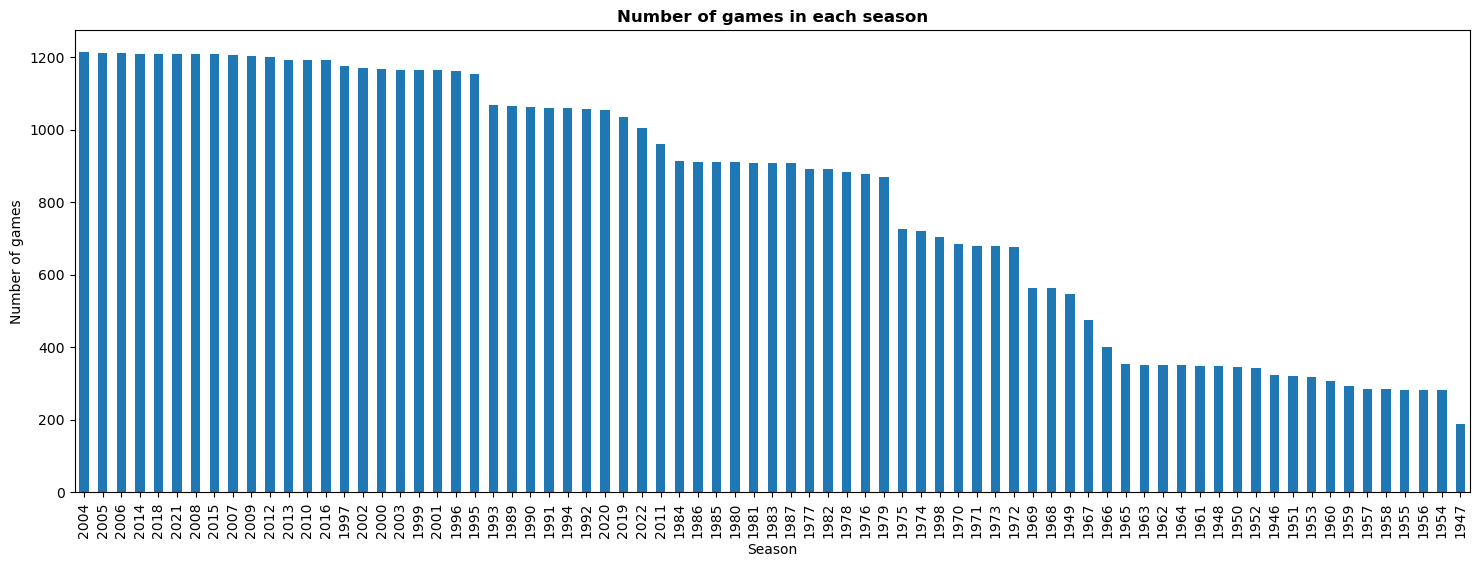

In [205]:
#total NBA games throughout the season
plt.figure(figsize=(18,6))
final_game_table["season"].value_counts().plot(kind = "bar")
plt.title("Number of games in each season", weight = "bold");
plt.ylabel("Number of games");
plt.xlabel("Season");

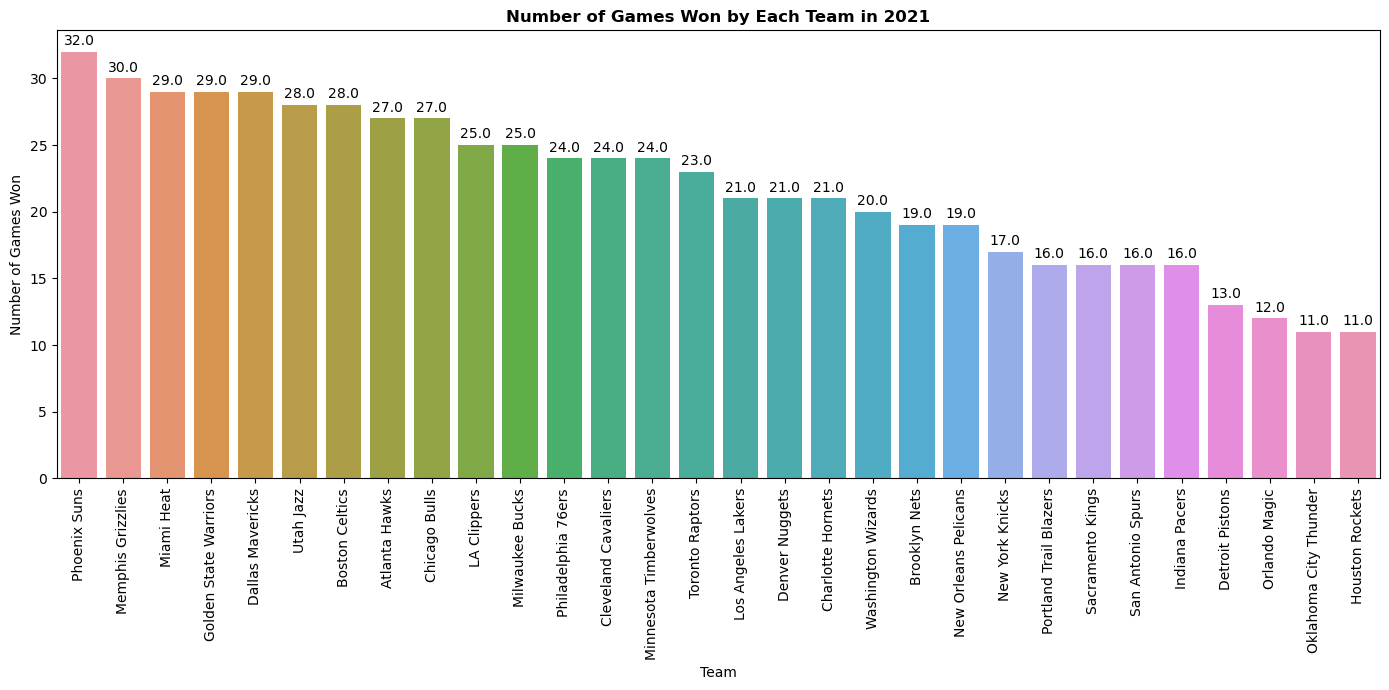

In [234]:


grp = final_game_table.groupby(["season", "team_name_home", "wl_home"])["season_id"].count().reset_index()
grp1 = pd.pivot_table(grp, index=['season', "team_name_home"], columns='wl_home', values='season_id').reset_index()
grp1.columns.name = None

def plot_bar(grp=grp1, season=1946):
    plt.figure(figsize=(14, 7))
    grp_season = grp[grp["season"] == season]
    grp_season = grp_season.sort_values(by="W", ascending=False)
    sns.barplot(x=grp_season["team_name_home"], y=grp_season["W"])
    plt.title(f"Number of Games Won by Each Team in {season}", weight="bold")
    plt.ylabel("Number of Games Won")
    plt.xlabel("Team")
    plt.xticks(rotation=90)
    plt.tight_layout()  # Adjusts spacing for better visualization
    for i, v in enumerate(grp_season["W"]):
        plt.text(i, v + 0.5, str(v), color="black", ha="center")
    plt.show()

plot_bar(grp=grp1, season=2021)


In [207]:
win  = final_game_table[(final_game_table["wl_home"]=="W") & (final_game_table["season"]>1945) & (final_game_table["season"]<=2022)]
# away
win_away = final_game_table[(final_game_table["wl_away"]=="W")]
pivot_table_away = win.pivot_table(
values="wl_away",
index="team_name_away",
columns="season",
aggfunc="count",
fill_value=0
)


# home
win_home = final_game_table[(final_game_table["wl_home"]=="W")]
pivot_table_home = win.pivot_table(
values="wl_home",
index="team_name_home",
columns="season",
aggfunc="count",
fill_value=0
)
pivot_table_home

season,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2012,2013,2014,2015,2016,2018,2019,2020,2021,2022
team_name_home,,,,,,,,,,,,,,,,,,,,,
Anderson Packers,0,0,0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlanta Hawks,0,0,0,0,0,0,0,0,0,0,...,24,22,35,27,23,17,14,25,27,17
Baltimore Bullets,0,15,18,17,20,17,11,15,0,0,...,0,0,0,0,0,0,0,0,0,0
Boston Celtics,14,13,18,16,29,28,34,31,28,23,...,26,16,21,28,28,28,25,19,28,26
Brooklyn Nets,0,0,0,0,0,0,0,0,0,0,...,26,28,19,14,13,23,20,28,19,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vancouver Grizzlies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Washington Bullets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Washington Capitols,29,20,22,22,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


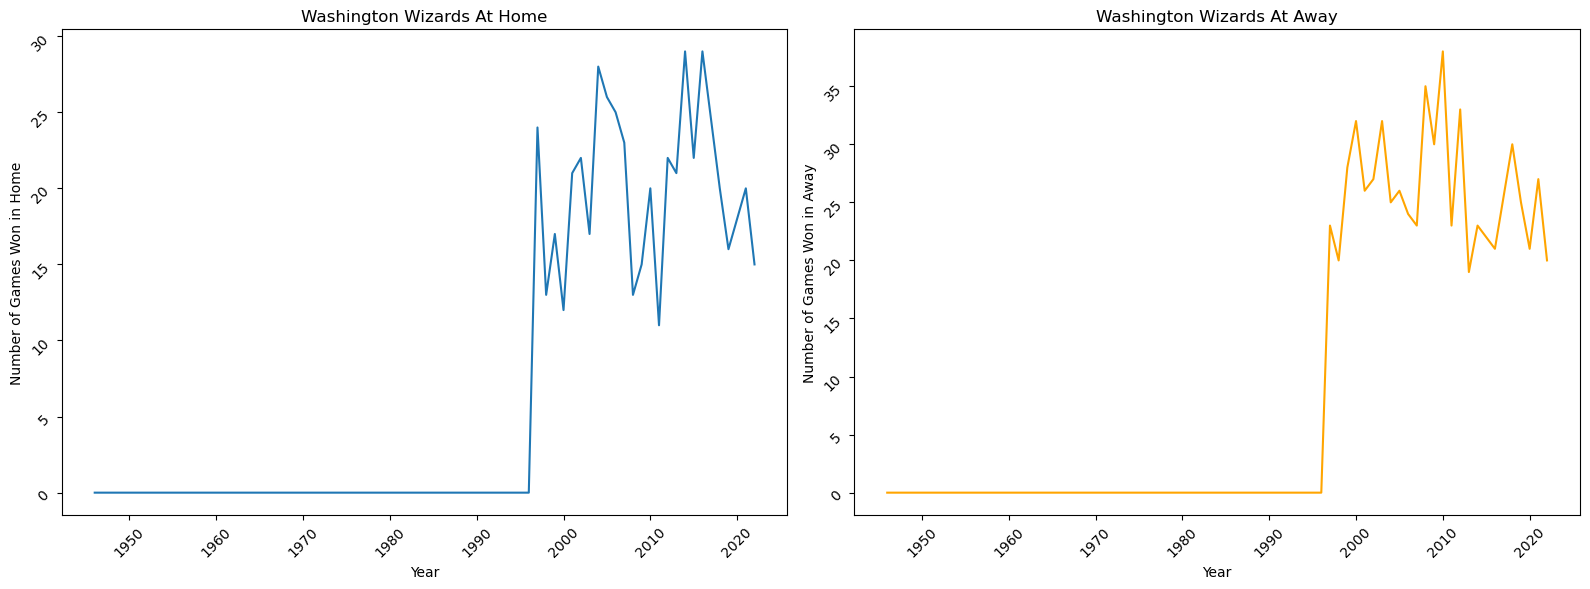

In [208]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
team = "Washington Wizards"
title = team + " At Home"
title1 = team + " At Away"

series = pivot_table_home.loc[team]
ax[0].plot(series.index, series.values)
ax[0].tick_params(labelrotation=45)
ax[0].set_ylabel("Number of Games Won in Home")
ax[0].set_xlabel("Year")
ax[0].set_title(title)

series = pivot_table_away.loc[team]
ax[1].plot(series.index, series.values, color="orange")
ax[1].tick_params(labelrotation=45)
ax[1].set_ylabel("Number of Games Won in Away")
ax[1].set_xlabel("Year")
ax[1].set_title(title1)

plt.tight_layout()
plt.show()




In [236]:
grp_home = final_game_table.groupby(["team_name_home", "season"])["attendance"].mean().reset_index()
#grp_home[grp_home["team_name_home"] ==  "New York Knicks"]
grp_home

,team_name_home,season,attendance
0,Anderson Packers,1949,<NA>
1,Atlanta Hawks,1968,4842.525
2,Atlanta Hawks,1969,5311.952381
3,Atlanta Hawks,1970,5989.146341
4,Atlanta Hawks,1971,5714.560976
...,...,...,...
1573,Washington Wizards,2019,16646.9375
1574,Washington Wizards,2020,3047.285714
1575,Washington Wizards,2021,15513.615385
1576,Washington Wizards,2022,17184.548387


In [210]:
import random

def plot_team_stats(pivot_table_home, grp_home, team_list):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Randomly select a team from the team list
    team = random.choice(team_list)

    # Plotting Number of Games Won in Home
    title = team + " At Home"
    series = pivot_table_home.loc[team]
    ax[0].plot(series.index, series.values)
    ax[0].tick_params(labelrotation=45)
    ax[0].set_ylabel("Number of Games Won in Home")
    ax[0].set_xlabel("Year")
    ax[0].set_title(title)

    # Plotting Attendance
    sample = grp_home[grp_home["team_name_home"] == team].dropna()
    season = sample["season"].astype(int)
    attendance = sample["attendance"].astype(float)
    ax[1].plot(sample["season"], sample["attendance"], color = "orange")
    ax[1].tick_params(labelrotation=45)
    ax[1].set_ylabel("Attendance")
    ax[1].set_xlabel("Season")
    ax[1].set_title("Attendance")

    plt.tight_layout()
    plt.show()


['Toronto Huskies', 'St. Louis Bombers', 'Providence Steamrollers', 'Chicago Stags', 'Detroit Falcons', 'Cleveland Rebels', 'Pittsburgh Ironmen', 'Boston Celtics', 'Philadelphia Warriors', 'New York Knicks', 'Washington Capitols', 'Baltimore Bullets', 'Indianapolis Jets', 'Ft. Wayne Zollner Pistons', 'Rochester Royals', 'Minneapolis Lakers', 'Tri-Cities Blackhawks', 'Indianapolis Olympians', 'Waterloo Hawks', 'Anderson Packers', 'Sheboygan Redskins', 'Syracuse Nationals', 'Denver Nuggets', 'Milwaukee Hawks', 'St. Louis Hawks', 'Detroit Pistons', 'Cincinnati Royals', 'Los Angeles Lakers', 'Chicago Packers', 'Chicago Zephyrs', 'San Francisco Warriors', 'Philadelphia 76ers', 'Chicago Bulls', 'San Diego Rockets', 'Seattle SuperSonics', 'Atlanta Hawks', 'Milwaukee Bucks', 'Phoenix Suns', 'Buffalo Braves', 'Portland Trail Blazers', 'Cleveland Cavaliers', 'Houston Rockets', 'Golden State Warriors', 'Kansas City-Omaha Kings', 'Capital Bullets', 'Washington Bullets', 'New Orleans Jazz', 'Kansas

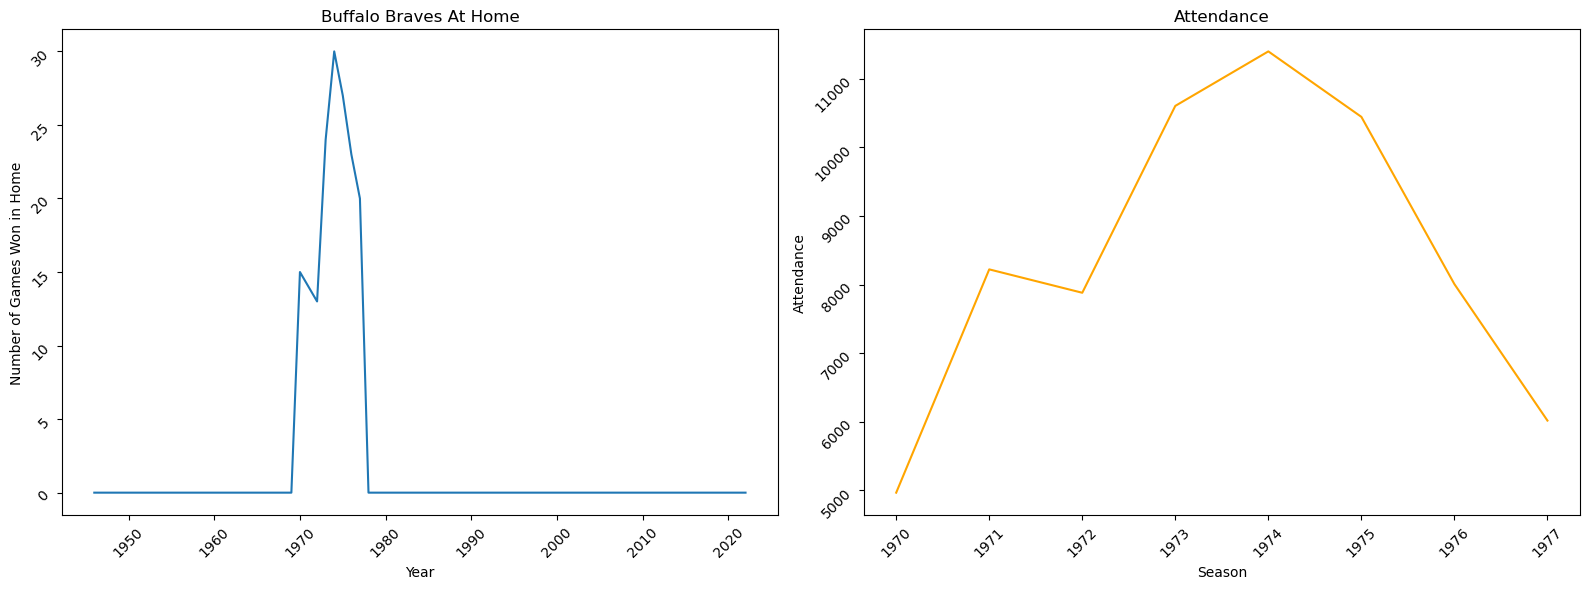

In [235]:
team_list = final_game_table["team_name_home"].unique().tolist()
print(team_list)
#team_list = ["Boston Celtics", "Los Angeles Lakers", "Chicago Bulls", "Golden State Warriors", "Miami Heat"]
plot_team_stats(pivot_table_home, grp_home, team_list)


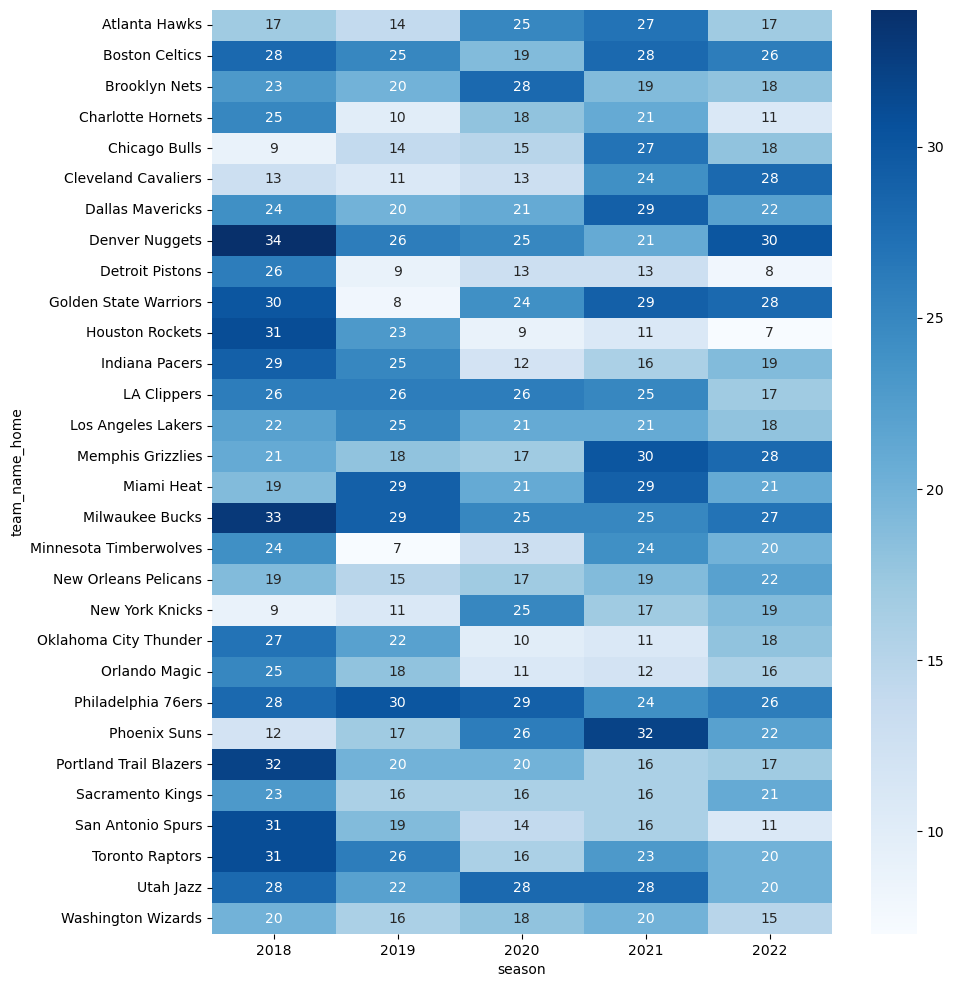

In [237]:
#heat map
def plot_heatmap(result = "W", lastn = 5, from_ = 2022):
#     MAX = 2022
    win  = final_game_table[(final_game_table["wl_home"]==result) & (final_game_table["season"]>from_-lastn) & (final_game_table["season"]<=from_)]
    pivot_table = win.pivot_table(
    values="wl_home",
    index="team_name_home",
    columns="season",
    aggfunc="count",
    fill_value=0

    )
    plt.figure(figsize=(10,12))
    sns.heatmap(pivot_table, cmap = "Blues", annot = True)
    plt.show()
plot_heatmap(result = "W", lastn = 5, from_ = 2022)

## Machine Learning

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('export/game_table')

# Select relevant columns for prediction
features = ['fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
            'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home', 'ast_home']
target = 'wl_home'  # Column representing the home team's win or loss

# Remove rows with missing values
data = data.dropna()

# Filter the data to include the last 10 games for each team
data = data.groupby('team_name_home').head(50)

# Sort the data by game date in descending order
data = data.sort_values('game_date', ascending=False)

# Filter the data to include only the most recent game for each team
data = data.drop_duplicates(subset='team_name_home', keep='first')

# Split the data into features and target
X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Function to predict the winner based on two team names
def predict_winner(team1, team2):
    # Find the most recent game record for each team
    team1_stats = data[data['team_name_home'] == team1][features].values
    team2_stats = data[data['team_name_home'] == team2][features].values
    team1_features = scaler.transform(team1_stats)
    team2_features = scaler.transform(team2_stats)
    
    # Calculate the average features for each team
    team1_avg_features = team1_features.mean(axis=0)
    team2_avg_features = team2_features.mean(axis=0)
    
    # Calculate the difference in features between the two teams
    matchup_features = team1_avg_features - team2_avg_features
    
    # Predict the winner
    winner = model.predict([matchup_features])
    if winner[0] == 1:
        predicted_winner = team1
    else:
        predicted_winner = team2
    
    # Calculate the accuracy of the model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    return predicted_winner, accuracy

# Example usage: predict the winner between two teams
team1 = "Los Angeles Lakers"
team2 = "Denver Nuggets"
winner, accuracy = predict_winner(team1, team2)
print("Winner:", winner)
print("Accuracy:", accuracy)


Winner: Denver Nuggets
Accuracy: 0.5


In [214]:
final_game_table["team_name_home"]

0                Toronto Huskies
1              St. Louis Bombers
2        Providence Steamrollers
3                  Chicago Stags
4                Detroit Falcons
                  ...           
62363         Philadelphia 76ers
62364          San Antonio Spurs
62365       New Orleans Pelicans
62366         Los Angeles Lakers
62367             Denver Nuggets
Name: team_name_home, Length: 62368, dtype: object

###-------------------------------------------------The END-------------------------------------------------

Winner: Denver Nuggets
Accuracy: 0.5


In [215]:
#checking columns
final_team_table.columns

Index(['team_id', 'full_name', 'abbreviation', 'nickname', 'city', 'state',
       'year_founded', 'arena', 'arena_capacity', 'owner', 'generalmanager',
       'headcoach', 'league_affiliation', 'facebook', 'instagram', 'twitter',
       'season_year', 'team_conference', 'team_division', 'w', 'l', 'pct',
       'conf_rank', 'div_rank', 'min_year', 'max_year', 'league_id',
       'season_id', 'pts_rank', 'pts_pg', 'reb_rank', 'reb_pg', 'ast_rank',
       'ast_pg', 'opp_pts_rank', 'opp_pts_pg', 'year_active_till'],
      dtype='object')

In [216]:
final_player_table.columns


Index(['player_id', 'first_name', 'last_name', 'display_first_last',
       'display_last_comma_first', 'display_fi_last', 'player_slug',
       'birthdate', 'school', 'country', 'last_affiliation', 'height',
       'weight', 'season_exp', 'jersey_num', 'position', 'rosterstatus',
       'games_played_current_season_flag', 'team_id', 'team_name',
       'team_abbreviation', 'team_code', 'team_city', 'playercode',
       'from_year', 'to_year', 'dleague_flag', 'nba_flag', 'games_played_flag',
       'draft_year', 'draft_round', 'draft_number', 'greatest_75_flag'],
      dtype='object')

In [217]:
final_player_table[["greatest_75_flag"]].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 51207 entries, 0 to 51206
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   greatest_75_flag  51207 non-null  object
dtypes: object(1)
memory usage: 800.1+ KB


In [218]:
final_game_table.columns.to_list()

['season_id',
 'team_id_home',
 'team_abbreviation_home',
 'team_name_home',
 'game_id',
 'game_date',
 'matchup_home',
 'wl_home',
 'min',
 'fgm_home',
 'fga_home',
 'fg_pct_home',
 'fg3m_home',
 'fg3a_home',
 'fg3_pct_home',
 'ftm_home',
 'fta_home',
 'ft_pct_home',
 'oreb_home',
 'dreb_home',
 'reb_home',
 'ast_home',
 'stl_home',
 'blk_home',
 'tov_home',
 'pf_home',
 'pts_home',
 'plus_minus_home',
 'video_available_home',
 'team_id_away',
 'team_abbreviation_away',
 'team_name_away',
 'matchup_away',
 'wl_away',
 'fgm_away',
 'fga_away',
 'fg_pct_away',
 'fg3m_away',
 'fg3a_away',
 'fg3_pct_away',
 'ftm_away',
 'fta_away',
 'ft_pct_away',
 'oreb_away',
 'dreb_away',
 'reb_away',
 'ast_away',
 'stl_away',
 'blk_away',
 'tov_away',
 'pf_away',
 'pts_away',
 'plus_minus_away',
 'video_available_away',
 'attendance',
 'game_time',
 'game_date_est',
 'game_sequence',
 'game_status_id',
 'game_status_text',
 'gamecode',
 'home_team_id',
 'visitor_team_id',
 'season',
 'live_period',
 '

In [219]:
corr_table = final_game_table[['game_id','attendance', 'matchup_home','wl_home']]

<AxesSubplot:>

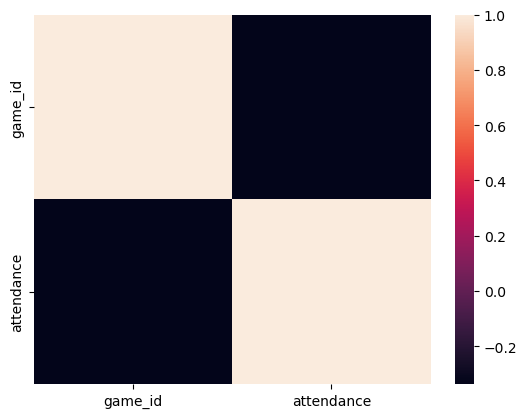

In [220]:
 
corr = corr_table.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [221]:
----------------------------------=++----------------------

SyntaxError: invalid syntax (187560083.py, line 1)

In [ ]:
final_game_table[(final_game_table["game_date"] >="2022-05-01") & (final_game_table["game_date"] <="2022-10-31")]

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
61350,22022,1610612738,BOS,Boston Celtics,22200001,2022-10-18,BOS vs. PHI,W,240,46.0,...,Final,20221018/PHIBOS,1.610613e+09,1.610613e+09,2022.0,4.0,,TNT,Q4 - TNT,1.0
61351,22022,1610612744,GSW,Golden State Warriors,22200002,2022-10-18,GSW vs. LAL,W,240,45.0,...,Final,20221018/LALGSW,1.610613e+09,1.610613e+09,2022.0,4.0,NaN,TNT,Q4 - TNT,1.0
61352,22022,1610612737,ATL,Atlanta Hawks,22200005,2022-10-19,ATL vs. HOU,W,240,45.0,...,Final,20221019/HOUATL,1.610613e+09,1.610613e+09,2022.0,4.0,,NaN,Q4 -,1.0
61353,22022,1610612754,IND,Indiana Pacers,22200004,2022-10-19,IND vs. WAS,L,240,39.0,...,Final,20221019/WASIND,1.610613e+09,1.610613e+09,2022.0,4.0,,NaN,Q4 -,1.0
61354,22022,1610612762,UTA,Utah Jazz,22200012,2022-10-19,UTA vs. DEN,W,240,42.0,...,Final,20221019/DENUTA,1.610613e+09,1.610613e+09,2022.0,4.0,NaN,NaN,Q4 -,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61447,22022,1610612764,WAS,Washington Wizards,22200097,2022-10-31,WAS vs. PHI,L,240,38.0,...,Final,20221031/PHIWAS,1.610613e+09,1.610613e+09,2022.0,4.0,NaN,NaN,Q4 -,1.0
61448,22022,1610612749,MIL,Milwaukee Bucks,22200100,2022-10-31,MIL vs. DET,W,240,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61449,22022,1610612751,BKN,Brooklyn Nets,22200098,2022-10-31,BKN vs. IND,W,240,43.0,...,Final,20221031/INDBKN,1.610613e+09,1.610613e+09,2022.0,4.0,,NBA TV,Q4 - NBA TV,1.0
61450,22022,1610612762,UTA,Utah Jazz,22200101,2022-10-31,UTA vs. MEM,W,240,42.0,...,Final,20221031/MEMUTA,1.610613e+09,1.610613e+09,2022.0,4.0,,NaN,Q4 -,1.0


In [ ]:

final_game_table

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,game_status_text,gamecode,home_team_id,visitor_team_id,season,live_period,live_pc_time,natl_tv_broadcaster_abbreviation,live_period_time_bcast,wh_status
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,...,NaN,19461101/NYKHUS,1.610610e+09,1.610613e+09,1946,5.0,NaN,NaN,Q5 -,1.0
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,...,NaN,19461102/PITBOM,1.610610e+09,1.610610e+09,1946,4.0,NaN,NaN,Q4 -,1.0
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,...,NaN,19461102/BOSPRO,1.610610e+09,1.610613e+09,1946,4.0,NaN,NaN,Q4 -,1.0
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,...,NaN,19461102/NYKCHS,1.610610e+09,1.610613e+09,1946,4.0,NaN,NaN,Q4 -,1.0
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,...,NaN,19461102/WASDEF,1.610610e+09,1.610610e+09,1946,4.0,NaN,NaN,Q4 -,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62363,22022,1610612755,PHI,Philadelphia 76ers,22201016,2023-03-12,PHI vs. WAS,W,240,41.0,...,Final,20230312/WASPHI,1.610613e+09,1.610613e+09,2022,4.0,,NaN,Q4 -,1.0
62364,22022,1610612759,SAS,San Antonio Spurs,22201018,2023-03-12,SAS vs. OKC,L,240,33.0,...,Final,20230312/OKCSAS,1.610613e+09,1.610613e+09,2022,4.0,,NaN,Q4 -,1.0
62365,22022,1610612740,NOP,New Orleans Pelicans,22201017,2023-03-12,NOP vs. POR,W,240,43.0,...,Final,20230312/PORNOP,1.610613e+09,1.610613e+09,2022,4.0,,NaN,Q4 -,1.0
62366,22022,1610612747,LAL,Los Angeles Lakers,22201019,2023-03-12,LAL vs. NYK,L,240,43.0,...,Final,20230312/NYKLAL,1.610613e+09,1.610613e+09,2022,4.0,,ESPN,Q4 - ESPN,1.0


In [ ]:
final_game_table
final_2022 = final_game_table[(final_game_table["matchup_home"] == "GSW vs. BOS") | (final_game_table["matchup_home"] == "BOS vs. GSW")]
final_2022[["team_abbreviation_home","team_name_home","game_id","game_date","matchup_home","wl_home","game_date"]]

,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,game_date
32458,BOS,Boston Celtics,29600508,1997-01-14,BOS vs. GSW,W,1997-01-14
32698,GSW,Golden State Warriors,29600749,1997-02-19,GSW vs. BOS,W,1997-02-19
33870,GSW,Golden State Warriors,29700729,1998-02-15,GSW vs. BOS,W,1998-02-15
33951,BOS,Boston Celtics,29700809,1998-02-27,BOS vs. GSW,W,1998-02-27
35781,GSW,Golden State Warriors,29900735,2000-02-18,GSW vs. BOS,W,2000-02-18
35975,BOS,Boston Celtics,29900918,2000-03-15,BOS vs. GSW,W,2000-03-15
36714,BOS,Boston Celtics,20000465,2001-01-05,BOS vs. GSW,L,2001-01-05
36829,GSW,Golden State Warriors,20000584,2001-01-21,GSW vs. BOS,W,2001-01-21
38142,GSW,Golden State Warriors,20100715,2002-02-13,GSW vs. BOS,W,2002-02-13
38454,BOS,Boston Celtics,20101017,2002-03-27,BOS vs. GSW,W,2002-03-27


In [ ]:
team_group = final_game_table.groupby(["team_name_home", "wl_home"])["wl_home"].count().sort_values(ascending=False)
team_group_df = team_group[team_group.index.get_level_values("wl_home") == "W"].to_frame()
team_group_df = team_group_df.rename(columns={"wl_home": "Total"})
team_group_df.head(10)


,,Total
team_name_home,wl_home,
Boston Celtics,W,2085
New York Knicks,W,1748
Los Angeles Lakers,W,1741
Detroit Pistons,W,1501
Philadelphia 76ers,W,1423
Phoenix Suns,W,1411
Chicago Bulls,W,1367
Portland Trail Blazers,W,1366
Milwaukee Bucks,W,1361


In [ ]:
indv_team = final_game_table[(final_game_table["team_name_home"] == "Boston Celtics") & (final_game_table["wl_home"] == "W")].count().sort_values(ascending=False)
indv_team

season_id                           2085
ftm_home                            2085
video_available_away                2085
plus_minus_away                     2085
pts_away                            2085
                                    ... 
game_sequence                        642
game_status_text                     628
game_time                            606
natl_tv_broadcaster_abbreviation     133
live_pc_time                          42
Length: 69, dtype: int64

In [ ]:
final_2022 = final_game_table[(final_game_table["season"] == 2022.0) & (final_game_table["game_status_text"] == "Final")]
final_date = final_2022["game_date"].idxmax()

final_date = final_2022.loc[final_date, ["team_abbreviation_home","wl_home", "team_abbreviation_away","game_date","matchup_home"]]
print(final_date.to_frame())

                                      62362
team_abbreviation_home                  CHA
wl_home                                   L
team_abbreviation_away                  CLE
game_date               2023-03-12 00:00:00
matchup_home                    CHA vs. CLE
